In [1]:
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Data Cleaning Listings/FINAL_TRAIN_DATA_ROME.csv'
#read data, and quickly check if it is correctly read in
train_data_rome= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Data Cleaning Listings/FINAL_VALID_DATA_ROME.csv'
#read data, and quickly check if it is correctly read in
valid_data_rome= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Data Cleaning Listings/FINAL_TEST_DATA_ROME.csv'
#read data, and quickly check if it is correctly read in
test_data_rome= pd.read_csv(file_path)

### Feature engineering

In [2]:
train_data_rome.info()
valid_data_rome.info()
test_data_rome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772602 entries, 0 to 772601
Columns: 126 entries, id to kitchen_amenities
dtypes: bool(96), float64(10), int64(19), object(1)
memory usage: 247.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85725 entries, 0 to 85724
Columns: 126 entries, id to kitchen_amenities
dtypes: bool(96), float64(10), int64(19), object(1)
memory usage: 27.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85755 entries, 0 to 85754
Columns: 126 entries, id to kitchen_amenities
dtypes: bool(96), float64(10), int64(19), object(1)
memory usage: 27.5+ MB


In [3]:
import pandas as pd

# Concatenate the datasets
combined_data = pd.concat([train_data_rome, valid_data_rome, test_data_rome], ignore_index=True)

# Display information about the combined dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944082 entries, 0 to 944081
Columns: 126 entries, id to kitchen_amenities
dtypes: bool(96), float64(10), int64(19), object(1)
memory usage: 302.5+ MB


In [ ]:
combined_data.to_csv('Combined_data_rome.csv', index=False)

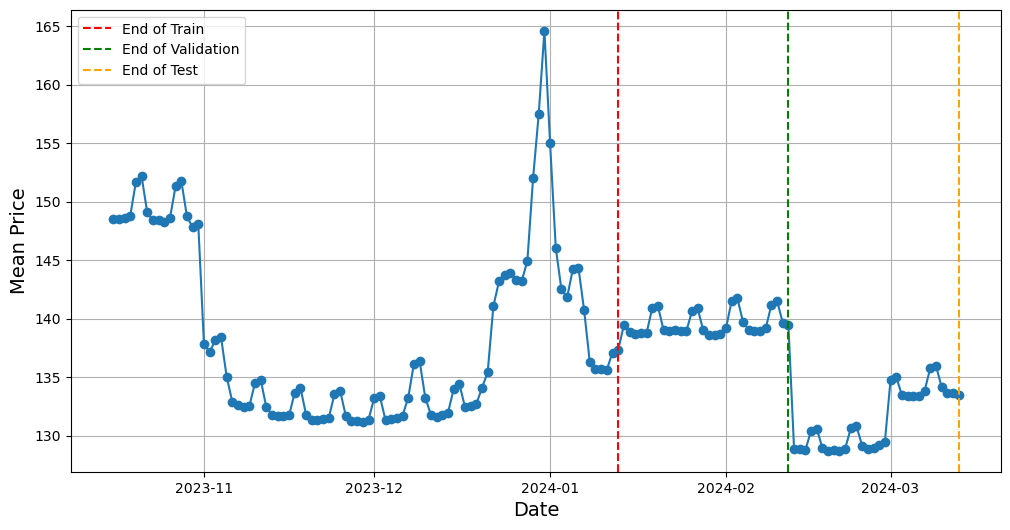

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Group by date and calculate the mean price
mean_price_over_time = combined_data.groupby('date')['price'].mean()

# Ensure the 'date' column in the train, validation, and test datasets are in datetime format
train_data_rome['date'] = pd.to_datetime(train_data_rome['date'])
valid_data_rome['date'] = pd.to_datetime(valid_data_rome['date'])
test_data_rome['date'] = pd.to_datetime(test_data_rome['date'])

# Determine the end dates of the train, validation, and test datasets
end_date_train = train_data_rome['date'].max()
end_date_valid = valid_data_rome['date'].max()
end_date_test = test_data_rome['date'].max()

# Plot the mean price over time
plt.figure(figsize=(12, 6))
plt.plot(mean_price_over_time.index, mean_price_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.grid(True)

# Add vertical lines for the end dates of train, validation, and test datasets
plt.axvline(x=end_date_train, color='r', linestyle='--', label='End of Train')
plt.axvline(x=end_date_valid, color='g', linestyle='--', label='End of Validation')
plt.axvline(x=end_date_test, color='orange', linestyle='--', label='End of Test')

# Add legend to explain the vertical lines
plt.legend()

plt.show()

In [5]:
# Assuming the necessary imports have been done
# import pandas as pd

# 1. Extract Date and Price Columns
date_price_data = combined_data[['date', 'price']]

# 2. Convert Date to Day of the Week
date_price_data['day_of_week'] = pd.to_datetime(date_price_data['date']).dt.day_name()

# 3. Group By Day of the Week and 4. Calculate Mean Price
average_price_per_day = date_price_data.groupby('day_of_week')['price'].mean().reset_index()

# 5. Output Results
print(average_price_per_day)

  day_of_week       price
0      Friday  139.521673
1      Monday  138.089335
2    Saturday  140.270926
3      Sunday  138.817733
4    Thursday  136.827474
5     Tuesday  137.230297
6   Wednesday  136.452965


C:\Users\anton\AppData\Local\Temp\ipykernel_22736\38797166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_price_data['day_of_week'] = pd.to_datetime(date_price_data['date']).dt.day_name()


In [6]:
# Count the unique IDs in the combined dataset
unique_ids_count = combined_data['id'].nunique()

# Display the count of unique IDs
print(f"Number of unique IDs in the combined dataset: {unique_ids_count}")

Number of unique IDs in the combined dataset: 14306


In [7]:
import pandas as pd

# Assuming the combined_data dataframe is already loaded
# combined_data = pd.read_csv('path_to_combined_data.csv')

# Extract the column names and store them in a set
column_names = list(combined_data.columns)

# Print the set of column names
print(column_names)

['id', 'date', 'available', 'price', 'season_Autumn', 'is_holiday', 'is_school_holiday', 'host_id', 'host_response_time', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'reviews_per_month', 'Bidet', 'game console', 'sound system', 'Books and reading material', 'toys children', 'Host greets you', 'crib', 'Heating', 'exercise equipment', 'Dining table', 'hot tub', 'Long term stays allowed', 'Iron', 'oven', 'Wine glasses', 'Smoke alarm', 'stove', 'soap', 'AC - split type ductless system', 'Essentials', 'Room-darkening shades', 'Washer', 'broadcast', 'Hot water', 'Bed linens', 'gym', 'pa

In [8]:
import pandas as pd

# Assuming the combined_data dataframe is already loaded
# combined_data = pd.read_csv('path_to_combined_data.csv')

# Count the number of columns starting with 'neighbourhood'
neighbourhood_columns = [col for col in combined_data.columns if col.startswith('neighbourhood')]
count_neighbourhood_columns = len(neighbourhood_columns)

# Print the result
print(f"Number of columns starting with 'neighbourhood': {count_neighbourhood_columns}")

Number of columns starting with 'neighbourhood': 15


In [9]:
import pandas as pd

# Assuming the dataset is already loaded into a DataFrame named 'df'
# Ensure the 'date' column is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Get the first and last date
first_date = combined_data['date'].min()
last_date = combined_data['date'].max()

print(f"First date in the dataset: {first_date}")
print(f"Last date in the dataset: {last_date}")

First date in the dataset: 2023-10-16 00:00:00
Last date in the dataset: 2024-03-13 00:00:00


In [10]:
import pandas as pd


# Count the unique IDs in each dataset
train_unique_ids_count = train_data_rome['id'].nunique()
valid_unique_ids_count = valid_data_rome['id'].nunique()
test_unique_ids_count = test_data_rome['id'].nunique()

# Display the count of unique IDs
print(f"Number of unique IDs in the training dataset: {train_unique_ids_count}")
print(f"Number of unique IDs in the validation dataset: {valid_unique_ids_count}")
print(f"Number of unique IDs in the test dataset: {test_unique_ids_count}")

Number of unique IDs in the training dataset: 8589
Number of unique IDs in the validation dataset: 2858
Number of unique IDs in the test dataset: 2859


In [11]:
import pandas as pd

# Ensure the 'date' column is in datetime format for each dataset
train_data_rome['date'] = pd.to_datetime(train_data_rome['date'])
valid_data_rome['date'] = pd.to_datetime(valid_data_rome['date'])
test_data_rome['date'] = pd.to_datetime(test_data_rome['date'])

# Get the first and last date for each dataset
train_first_date = train_data_rome['date'].min()
train_last_date = train_data_rome['date'].max()

valid_first_date = valid_data_rome['date'].min()
valid_last_date = valid_data_rome['date'].max()

test_first_date = test_data_rome['date'].min()
test_last_date = test_data_rome['date'].max()

# Display the first and last date for each dataset
print(f"First date in the training dataset: {train_first_date}")
print(f"Last date in the training dataset: {train_last_date}")

print(f"First date in the validation dataset: {valid_first_date}")
print(f"Last date in the validation dataset: {valid_last_date}")

print(f"First date in the test dataset: {test_first_date}")
print(f"Last date in the test dataset: {test_last_date}")

First date in the training dataset: 2023-10-16 00:00:00
Last date in the training dataset: 2024-01-13 00:00:00
First date in the validation dataset: 2024-01-14 00:00:00
Last date in the validation dataset: 2024-02-12 00:00:00
First date in the test dataset: 2024-02-13 00:00:00
Last date in the test dataset: 2024-03-13 00:00:00


# Engineering dataset for baseline models

In [12]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Extract unique IDs from each dataset
unique_train_ids = train_data_rome['id'].unique()
unique_valid_ids = valid_data_rome['id'].unique()
unique_test_ids = test_data_rome['id'].unique()

# Randomly select 6000 unique IDs for training, 2000 for validation, and 2000 for testing
selected_train_ids = np.random.choice(unique_train_ids, 6000, replace=False)
selected_valid_ids = np.random.choice(unique_valid_ids, 2000, replace=False)
selected_test_ids = np.random.choice(unique_test_ids, 2000, replace=False)

# Ensure IDs are exclusive to each dataset
selected_train_ids = set(selected_train_ids)
selected_valid_ids = set(selected_valid_ids)
selected_test_ids = set(selected_test_ids)

# Filter datasets based on the selected unique IDs
train_data_rome_filtered = train_data_rome[train_data_rome['id'].isin(selected_train_ids)]
valid_data_rome_filtered = valid_data_rome[valid_data_rome['id'].isin(selected_valid_ids)]
test_data_rome_filtered = test_data_rome[test_data_rome['id'].isin(selected_test_ids)]

# Check the amount of unique IDs in the filtered datasets
train_unique_count = len(train_data_rome_filtered['id'].unique())
valid_unique_count = len(valid_data_rome_filtered['id'].unique())
test_unique_count = len(test_data_rome_filtered['id'].unique())

# Display the result
print("Filtered Train Data Info:")
print(train_data_rome_filtered.info())
print(f"Number of unique IDs in filtered train data: {train_unique_count}")

print("\nFiltered Validation Data Info:")
print(valid_data_rome_filtered.info())
print(f"Number of unique IDs in filtered validation data: {valid_unique_count}")

print("\nFiltered Test Data Info:")
print(test_data_rome_filtered.info())
print(f"Number of unique IDs in filtered test data: {test_unique_count}")

Filtered Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 539729 entries, 0 to 772601
Columns: 126 entries, id to kitchen_amenities
dtypes: bool(96), datetime64[ns](1), float64(10), int64(19)
memory usage: 177.1 MB
None
Number of unique IDs in filtered train data: 6000

Filtered Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 59985 entries, 0 to 85724
Columns: 126 entries, id to kitchen_amenities
dtypes: bool(96), datetime64[ns](1), float64(10), int64(19)
memory usage: 19.7 MB
None
Number of unique IDs in filtered validation data: 2000

Filtered Test Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 0 to 85754
Columns: 126 entries, id to kitchen_amenities
dtypes: bool(96), datetime64[ns](1), float64(10), int64(19)
memory usage: 19.7 MB
None
Number of unique IDs in filtered test data: 2000


In [13]:
import pandas as pd


# Function to count the number of unique days and get the start and end dates in the dataset
def analyze_dates(data):
    unique_days = data['date'].nunique()
    start_date = data['date'].min()
    end_date = data['date'].max()
    return unique_days, start_date, end_date

# Analyze the dates in each dataset
train_unique_days, train_start_date, train_end_date = analyze_dates(train_data_rome_filtered)
valid_unique_days, valid_start_date, valid_end_date = analyze_dates(valid_data_rome_filtered)
test_unique_days, test_start_date, test_end_date = analyze_dates(test_data_rome_filtered)

# Check for overlapping IDs
train_ids = set(train_data_rome_filtered['id'])
valid_ids = set(valid_data_rome_filtered['id'])
test_ids = set(test_data_rome_filtered['id'])

no_overlap_train_valid = train_ids.isdisjoint(valid_ids)
no_overlap_train_test = train_ids.isdisjoint(test_ids)
no_overlap_valid_test = valid_ids.isdisjoint(test_ids)

# Display the results
print(f"Train Data: Unique days: {train_unique_days}, Start date: {train_start_date}, End date: {train_end_date}")
print(f"Validation Data: Unique days: {valid_unique_days}, Start date: {valid_start_date}, End date: {valid_end_date}")
print(f"Test Data: Unique days: {test_unique_days}, Start date: {test_start_date}, End date: {test_end_date}")

print(f"\nNo overlapping IDs between train and validation sets: {no_overlap_train_valid}")
print(f"No overlapping IDs between train and test sets: {no_overlap_train_test}")
print(f"No overlapping IDs between validation and test sets: {no_overlap_valid_test}")

Train Data: Unique days: 90, Start date: 2023-10-16 00:00:00, End date: 2024-01-13 00:00:00
Validation Data: Unique days: 30, Start date: 2024-01-14 00:00:00, End date: 2024-02-12 00:00:00
Test Data: Unique days: 30, Start date: 2024-02-13 00:00:00, End date: 2024-03-13 00:00:00

No overlapping IDs between train and validation sets: True
No overlapping IDs between train and test sets: True
No overlapping IDs between validation and test sets: True


#### Data ready for LSTM model

In [ ]:
train_data_rome_filtered.to_csv('Train_model_Rome_Vince.csv', index=False)
valid_data_rome_filtered.to_csv('Valid_model_Rome_Vince.csv', index=False)
test_data_rome_filtered.to_csv('Test_model_Rome_Vince.csv', index=False)

#### Reading in data with and without LSTM features

In [14]:
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/Train_model_Rome_Vince.csv'
#read data, and quickly check if it is correctly read in
train_data_rome_filtered= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/Valid_model_Rome_Vince.csv'
#read data, and quickly check if it is correctly read in
valid_data_rome_filtered= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/Test_model_Rome_Vince.csv'
#read data, and quickly check if it is correctly read in
test_data_rome_filtered= pd.read_csv(file_path)

In [15]:
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/rome met lstm/train_data_lstm_rome_FINAL.csv'
#read data, and quickly check if it is correctly read in
train_data_lstm_rome= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/rome met lstm/val_data_lstm_rome_FINAL.csv'
#read data, and quickly check if it is correctly read in
valid_data_lstm_rome= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/rome met lstm/test_data_lstm_rome_FINAL.csv'
#read data, and quickly check if it is correctly read in
test_data_lstm_rome= pd.read_csv(file_path)

In [16]:
train_data_rome_filtered["price"].describe()

count    539729.000000
mean        140.116282
std         183.200761
min          10.000000
25%          65.000000
50%          99.000000
75%         150.000000
max        5000.000000
Name: price, dtype: float64

In [17]:
# Step 1: Group the data by 'id'
grouped = train_data_rome_filtered.groupby('id')

# Step 2: Calculate the standard deviation of 'price' for each 'id'
std_per_id = grouped['price'].std()

# Step 3: Calculate the average of these standard deviations
average_std = std_per_id.mean()

print(f"The average standard deviation of price per ID is: {average_std}")

The average standard deviation of price per ID is: 18.834817061145607


#### Selecting last days without the LSTM features

In [18]:
import pandas as pd

# Function to select the last day for each ID in the given dataframe
def select_last_day_per_id(data):
    data = data.sort_values(by=['id', 'date'])
    last_day_data = data.groupby('id').tail(1)
    return last_day_data

# Apply the function to each split
train_data_rome_last_day = select_last_day_per_id(train_data_rome_filtered)
valid_data_rome_last_day = select_last_day_per_id(valid_data_rome_filtered)
test_data_rome_last_day = select_last_day_per_id(test_data_rome_filtered)

# Calculate the total unique IDs across all splits
total_unique_ids = set(train_data_rome_filtered['id']).union(valid_data_rome_filtered['id']).union(test_data_rome_filtered['id'])
total_unique_count = len(total_unique_ids)

# Calculate the percentage of unique IDs in each split based on the total unique IDs
train_unique_count = len(set(train_data_rome_last_day['id']))
valid_unique_count = len(set(valid_data_rome_last_day['id']))
test_unique_count = len(set(test_data_rome_last_day['id']))

train_percentage = (train_unique_count / total_unique_count) * 100
valid_percentage = (valid_unique_count / total_unique_count) * 100
test_percentage = (test_unique_count / total_unique_count) * 100

print("\nPercentage of unique IDs per split:")
print(f"Train: {train_percentage:.2f}%")
print(f"Validation: {valid_percentage:.2f}%")
print(f"Test: {test_percentage:.2f}%")


Percentage of unique IDs per split:
Train: 60.00%
Validation: 20.00%
Test: 20.00%


In [19]:
import pandas as pd

# Function to get the first and last date in the dataset
def get_first_last_dates(data):
    first_date = data['date'].min()
    last_date = data['date'].max()
    return first_date, last_date

# Get the first and last date for each dataset
train_first_date, train_last_date = get_first_last_dates(train_data_rome_last_day)
valid_first_date, valid_last_date = get_first_last_dates(valid_data_rome_last_day)
test_first_date, test_last_date = get_first_last_dates(test_data_rome_last_day)

# Display the results
print(f"Train Data: First date: {train_first_date}, Last date: {train_last_date}")
print(f"Validation Data: First date: {valid_first_date}, Last date: {valid_last_date}")
print(f"Test Data: First date: {test_first_date}, Last date: {test_last_date}")

Train Data: First date: 2023-10-31, Last date: 2024-01-13
Validation Data: First date: 2024-01-28, Last date: 2024-02-12
Test Data: First date: 2024-03-13, Last date: 2024-03-13


In [20]:
train_data_rome_last_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 539459 to 538444
Columns: 126 entries, id to kitchen_amenities
dtypes: bool(96), float64(10), int64(19), object(1)
memory usage: 2.0+ MB


In [ ]:
train_data_rome_last_day.to_csv('Baslinemodels_train_rome.csv', index=False)
valid_data_rome_last_day.to_csv('Baslinemodels_valid_rome.csv', index=False)
test_data_rome_last_day.to_csv('Baslinemodels_test_rome.csv', index=False)

#### With the LSTM features

In [21]:
# Extracting unique IDs from each dataset
train_ids = set(train_data_lstm_rome['id'])
valid_ids = set(valid_data_lstm_rome['id'])
test_ids = set(test_data_lstm_rome['id'])

# Check for overlapping IDs between the datasets
train_valid_overlap = train_ids.intersection(valid_ids)
train_test_overlap = train_ids.intersection(test_ids)
valid_test_overlap = valid_ids.intersection(test_ids)

# Print the results
print(f"Overlapping IDs between train and validation sets: {train_valid_overlap}")
print(f"Number of overlapping IDs between train and validation sets: {len(train_valid_overlap)}\n")

print(f"Overlapping IDs between train and test sets: {train_test_overlap}")
print(f"Number of overlapping IDs between train and test sets: {len(train_test_overlap)}\n")

print(f"Overlapping IDs between validation and test sets: {valid_test_overlap}")
print(f"Number of overlapping IDs between validation and test sets: {len(valid_test_overlap)}\n")

Overlapping IDs between train and validation sets: set()
Number of overlapping IDs between train and validation sets: 0

Overlapping IDs between train and test sets: set()
Number of overlapping IDs between train and test sets: 0

Overlapping IDs between validation and test sets: set()
Number of overlapping IDs between validation and test sets: 0



In [22]:
import pandas as pd

# Function to get the first and last date in the dataset
def get_first_last_dates(data):
    first_date = data['date'].min()
    last_date = data['date'].max()
    return first_date, last_date

# Get the first and last date for each dataset
train_first_date, train_last_date = get_first_last_dates(train_data_lstm_rome)
valid_first_date, valid_last_date = get_first_last_dates(valid_data_lstm_rome)
test_first_date, test_last_date = get_first_last_dates(test_data_lstm_rome)

# Display the results
print(f"Merged Train Data: First date: {train_first_date}, Last date: {train_last_date}")
print(f"Merged Validation Data: First date: {valid_first_date}, Last date: {valid_last_date}")
print(f"Merged Test Data: First date: {test_first_date}, Last date: {test_last_date}")

Merged Train Data: First date: 2023-10-31, Last date: 2024-01-13
Merged Validation Data: First date: 2024-01-28, Last date: 2024-02-12
Merged Test Data: First date: 2024-03-13, Last date: 2024-03-13


In [ ]:
train_data_lstm_rome.to_csv('Baslinemodels_train_lstm_rome.csv', index=False)
valid_data_lstm_rome.to_csv('Baslinemodels_valid_lstm_rome.csv', index=False)
test_data_lstm_rome.to_csv('Baslinemodels_test_lstm_rome.csv', index=False)

#### Check if original dataset and lstm dataset are identical except additional columns

In [23]:
import pandas as pd

# Assuming the dataframes are already loaded

# Get the list of columns to compare, excluding the last 16 columns from train_data_lstm_rome
columns_to_compare = train_data_lstm_rome.columns[:-16]

# Extract the relevant columns from train_data_lstm_rome
trimmed_train_data_lstm_rome = train_data_lstm_rome[columns_to_compare]

# Align dataframes to ensure they have the same order of columns and index
trimmed_train_data_lstm_rome = trimmed_train_data_lstm_rome.reset_index(drop=True)
train_data_rome_last_day = train_data_rome_last_day[columns_to_compare].reset_index(drop=True)

# Compare the dataframes
differences = trimmed_train_data_lstm_rome != train_data_rome_last_day

# Find the indices and columns where differences occur
diff_indices = differences[differences].stack().index.tolist()

if not diff_indices:
    print("The data in train_data_lstm_rome (excluding the last 16 columns) is identical to train_data_rome_last_day.")
else:
    print("Differences found:")
    for index, column in diff_indices:
        lstm_value = trimmed_train_data_lstm_rome.loc[index, column]
        last_day_value = train_data_rome_last_day.loc[index, column]
        print(f"Row {index}, Column '{column}': train_data_lstm_rome = {lstm_value}, train_data_rome_last_day = {last_day_value}")

The data in train_data_lstm_rome (excluding the last 16 columns) is identical to train_data_rome_last_day.


# Baseline models

In [24]:
#WITHOUT LSTM
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_train_rome.csv'
#read data, and quickly check if it is correctly read in
train_data_rome= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_valid_rome.csv'
#read data, and quickly check if it is correctly read in
valid_data_rome= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_test_rome.csv'
#read data, and quickly check if it is correctly read in
test_data_rome= pd.read_csv(file_path)

In [25]:
#WITH LSTM
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_train_lstm_rome.csv'
#read data, and quickly check if it is correctly read in
train_data_lstm_rome= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_valid_lstm_rome.csv'
#read data, and quickly check if it is correctly read in
valid_data_lstm_rome= pd.read_csv(file_path)

import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Rome Airbnb_Spatiotemporal_Analysis/Baseline models/Baslinemodels_test_lstm_rome.csv'
#read data, and quickly check if it is correctly read in
test_data_lstm_rome= pd.read_csv(file_path)

In [26]:
train_data_lstm_rome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 142 entries, id to 15
dtypes: bool(96), float64(26), int64(19), object(1)
memory usage: 2.7+ MB


In [27]:
import pandas as pd

# Check for NaN values in the train dataset
train_nan_counts = train_data_lstm_rome.isna().sum()
train_columns_with_nan = train_nan_counts[train_nan_counts > 0]
print("Train Data - Columns with NaN values and their counts:")
print(train_columns_with_nan)

# Check for NaN values in the valid dataset
valid_nan_counts = valid_data_lstm_rome.isna().sum()
valid_columns_with_nan = valid_nan_counts[valid_nan_counts > 0]
print("\nValid Data - Columns with NaN values and their counts:")
print(valid_columns_with_nan)

# Check for NaN values in the test dataset
test_nan_counts = test_data_lstm_rome.isna().sum()
test_columns_with_nan = test_nan_counts[test_nan_counts > 0]
print("\nTest Data - Columns with NaN values and their counts:")
print(test_columns_with_nan)

Train Data - Columns with NaN values and their counts:
Series([], dtype: int64)

Valid Data - Columns with NaN values and their counts:
Series([], dtype: int64)

Test Data - Columns with NaN values and their counts:
Series([], dtype: int64)


In [28]:
import pandas as pd

# Extract IDs from each dataset
train_ids = set(train_data_lstm_rome['id'])
valid_ids = set(valid_data_lstm_rome['id'])
test_ids = set(test_data_lstm_rome['id'])

# Check for overlapping IDs between the datasets
overlap_train_valid = train_ids.intersection(valid_ids)
overlap_train_test = train_ids.intersection(test_ids)
overlap_valid_test = valid_ids.intersection(test_ids)

# Output the results
if not overlap_train_valid and not overlap_train_test and not overlap_valid_test:
    print("IDs are unique across the train, validation, and test datasets.")
else:
    print("There are overlapping IDs between the datasets.")
    if overlap_train_valid:
        print(f"Overlapping IDs between train and validation datasets: {overlap_train_valid}")
    if overlap_train_test:
        print(f"Overlapping IDs between train and test datasets: {overlap_train_test}")
    if overlap_valid_test:
        print(f"Overlapping IDs between validation and test datasets: {overlap_valid_test}")

IDs are unique across the train, validation, and test datasets.


In [29]:
# Print a list of all columns in the dataset
columns_list = train_data_lstm_rome.columns.tolist()
print("List of all columns in the dataset:")
print(columns_list)

List of all columns in the dataset:
['id', 'date', 'available', 'price', 'season_Autumn', 'is_holiday', 'is_school_holiday', 'host_id', 'host_response_time', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'reviews_per_month', 'Bidet', 'game console', 'sound system', 'Books and reading material', 'toys children', 'Host greets you', 'crib', 'Heating', 'exercise equipment', 'Dining table', 'hot tub', 'Long term stays allowed', 'Iron', 'oven', 'Wine glasses', 'Smoke alarm', 'stove', 'soap', 'AC - split type ductless system', 'Essentials', 'Room-darkening shades', 'Washer', 'broadcast', '

In [30]:
import pandas as pd

# Ensure the 'date' column is in datetime format for each dataset
train_data_lstm_rome['date'] = pd.to_datetime(train_data_lstm_rome['date'])
valid_data_lstm_rome['date'] = pd.to_datetime(valid_data_lstm_rome['date'])
test_data_lstm_rome['date'] = pd.to_datetime(test_data_lstm_rome['date'])

# Get the first and last date for each dataset
train_lstm_first_date = train_data_lstm_rome['date'].min()
train_lstm_last_date = train_data_lstm_rome['date'].max()

valid_lstm_first_date = valid_data_lstm_rome['date'].min()
valid_lstm_last_date = valid_data_lstm_rome['date'].max()

test_lstm_first_date = test_data_lstm_rome['date'].min()
test_lstm_last_date = test_data_lstm_rome['date'].max()

# Display the first and last date for each dataset
print(f"First date in the LSTM training dataset (rome): {train_lstm_first_date}")
print(f"Last date in the LSTM training dataset (rome): {train_lstm_last_date}")

print(f"First date in the LSTM validation dataset (rome): {valid_lstm_first_date}")
print(f"Last date in the LSTM validation dataset (rome): {valid_lstm_last_date}")

print(f"First date in the LSTM test dataset (rome): {test_lstm_first_date}")
print(f"Last date in the LSTM test dataset (rome): {test_lstm_last_date}")

First date in the LSTM training dataset (rome): 2023-10-31 00:00:00
Last date in the LSTM training dataset (rome): 2024-01-13 00:00:00
First date in the LSTM validation dataset (rome): 2024-01-28 00:00:00
Last date in the LSTM validation dataset (rome): 2024-02-12 00:00:00
First date in the LSTM test dataset (rome): 2024-03-13 00:00:00
Last date in the LSTM test dataset (rome): 2024-03-13 00:00:00


In [31]:
import pandas as pd

# List of datasets to check
datasets = {
    "Train Data": train_data_lstm_rome,
    "Validation Data": valid_data_lstm_rome,
    "Test Data": test_data_lstm_rome
}

# Loop through each dataset and print the number of missing values per column
for dataset_name, dataset in datasets.items():
    print(f"\nMissing values in {dataset_name}:")
    missing_values_count = dataset.isnull().sum()
    print(missing_values_count[missing_values_count > 0])



Missing values in Train Data:
Series([], dtype: int64)

Missing values in Validation Data:
Series([], dtype: int64)

Missing values in Test Data:
Series([], dtype: int64)


In [ ]:
!pip install pickle 

## XGB

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm
import pickle

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_rome, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_rome, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_rome, 'price')

# Apply scaling to both features and target
X_train, y_train, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid, y_valid, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test, y_test, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Save the scaler
with open('scaler_without_LSTM.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the scaled datasets
scaled_train_df = pd.DataFrame(X_train, columns=X_train_raw.columns)
scaled_train_df['price'] = y_train
scaled_valid_df = pd.DataFrame(X_valid, columns=X_valid_raw.columns)
scaled_valid_df['price'] = y_valid
scaled_test_df = pd.DataFrame(X_test, columns=X_test_raw.columns)
scaled_test_df['price'] = y_test

scaled_train_df.to_csv('scaled_train_data_without_LSTM.csv', index=False)
scaled_valid_df.to_csv('scaled_valid_data_without_LSTM.csv', index=False)
scaled_test_df.to_csv('scaled_test_data_without_LSTM.csv', index=False)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    model = XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        **param
    )
    
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    rmse = np.sqrt(mse)
    return rmse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    **best_params
)

best_model.fit(X_train, y_train)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train)
y_valid_pred_scaled = best_model.predict(X_valid)
y_test_pred_scaled = best_model.predict(X_test)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'xgb_model_without_lstm_rome.joblib')

# Load the model
loaded_model = joblib.load('xgb_model_without_lstm_rome.joblib')

In [32]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('xgb_model_without_lstm_rome.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  10.320959624608358
Mean Squared Error (MSE):  224.98246216473396
R-squared (R2):  0.9942853932385256

Validation Performance Metrics:
Mean Absolute Error (MAE):  65.86548789269584
Mean Squared Error (MSE):  29193.521911676777
R-squared (R2):  0.5002976809483933

Test Performance Metrics:
Mean Absolute Error (MAE):  63.529364874990364
Mean Squared Error (MSE):  26529.97274089376
R-squared (R2):  0.24507474054813394



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm
import pickle

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets for LSTM data
X_train_raw, y_train_raw = prepare_data(train_data_lstm_rome, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_rome, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_rome, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Save the scaler
with open('scaler_with_LSTM.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the scaled datasets
scaled_train_df = pd.DataFrame(X_train_scaled, columns=X_train_raw.columns)
scaled_train_df['price'] = y_train_scaled
scaled_valid_df = pd.DataFrame(X_valid_scaled, columns=X_valid_raw.columns)
scaled_valid_df['price'] = y_valid_scaled
scaled_test_df = pd.DataFrame(X_test_scaled, columns=X_test_raw.columns)
scaled_test_df['price'] = y_test_scaled

scaled_train_df.to_csv('scaled_train_data_with_LSTM.csv', index=False)
scaled_valid_df.to_csv('scaled_valid_data_with_LSTM.csv', index=False)
scaled_test_df.to_csv('scaled_test_data_with_LSTM.csv', index=False)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    model = XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',  # Use rmse for evaluation
        **param
    )
    
    model.fit(X_train_scaled, y_train_scaled, eval_set=[(X_valid_scaled, y_valid_scaled)], verbose=False)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    rmse = np.sqrt(mse)
    return rmse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',  # Use rmse for evaluation
    **best_params
)

best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with original scale:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'xgb_model_with_lstm_rome.joblib')

# Load the model
loaded_model = joblib.load('xgb_model_with_lstm_rome.joblib')

In [33]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('xgb_model_with_lstm_rome.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  13.783514724095662
Mean Squared Error (MSE):  1130.6136853979906
R-squared (R2):  0.9712821499550484

Validation Performance Metrics:
Mean Absolute Error (MAE):  15.964686856133596
Mean Squared Error (MSE):  3141.6623817531954
R-squared (R2):  0.9462245088965665

Test Performance Metrics:
Mean Absolute Error (MAE):  19.838816612745585
Mean Squared Error (MSE):  4604.503598249054
R-squared (R2):  0.8689762666737624



## RF

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping the unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_rome, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_rome, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_rome, 'price')

# Apply scaling to both features and target
X_train, y_train, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid, y_valid, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test, y_test, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 15),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
    }

    model = RandomForestRegressor(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train)
y_valid_pred_scaled = best_model.predict(X_valid)
y_test_pred_scaled = best_model.predict(X_test)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'rf_model_without_lstm_rome.joblib')

# Load the model
loaded_model = joblib.load('rf_model_without_lstm_rome.joblib')

In [34]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('rf_model_without_lstm_rome.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  46.938112739288066
Mean Squared Error (MSE):  16881.977472947197
R-squared (R2):  0.5711938535754688

Validation Performance Metrics:
Mean Absolute Error (MAE):  69.90574138088118
Mean Squared Error (MSE):  41794.834136282116
R-squared (R2):  0.28460239893413164

Test Performance Metrics:
Mean Absolute Error (MAE):  62.206482504833446
Mean Squared Error (MSE):  28913.543471761695
R-squared (R2):  0.17724889805683364



## With LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping the unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_lstm_rome, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_rome, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_rome, 'price')

# Apply scaling to both features and target
X_train, y_train, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid, y_valid, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test, y_test, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 15),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
    }

    model = RandomForestRegressor(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train)
y_valid_pred_scaled = best_model.predict(X_valid)
y_test_pred_scaled = best_model.predict(X_test)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'rf_model_with_lstm_rome.joblib')

# Load the model
loaded_model = joblib.load('rf_model_with_lstm_rome.joblib')

In [35]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('rf_model_with_lstm_rome.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  13.267459467428383
Mean Squared Error (MSE):  3424.5814377950064
R-squared (R2):  0.9130148365728452

Validation Performance Metrics:
Mean Absolute Error (MAE):  19.811319799310425
Mean Squared Error (MSE):  5138.590271358024
R-squared (R2):  0.912043312793083

Test Performance Metrics:
Mean Absolute Error (MAE):  19.29503837077589
Mean Squared Error (MSE):  3781.459929577502
R-squared (R2):  0.8923964360489969



## Linear Regression

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping the unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_rome, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_rome, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_rome, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = LinearRegression(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'linear_model_without_lstm_rome.joblib')

# Load the model
loaded_model = joblib.load('linear_model_without_lstm_rome.joblib')

In [36]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('linear_model_without_lstm_rome.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  76.06351557004503
Mean Squared Error (MSE):  30424.90572169974
R-squared (R2):  0.227200332499073

Validation Performance Metrics:
Mean Absolute Error (MAE):  85.61600940884702
Mean Squared Error (MSE):  46606.07160521279
R-squared (R2):  0.20224897381446438

Test Performance Metrics:
Mean Absolute Error (MAE):  19339748691.128567
Mean Squared Error (MSE):  3.7402587943600914e+20
R-squared (R2):  -1.0643116253176716e+16



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets for LSTM data
X_train_raw, y_train_raw = prepare_data(train_data_lstm_rome, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_rome, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_rome, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Since there are no hyperparameters to tune, we use a default Linear Regression model
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'linear_model_with_lstm_rome.joblib')

# Load the model
loaded_model = joblib.load('linear_model_with_lstm_rome.joblib')

In [37]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('linear_model_with_lstm_rome.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  21.156369223197302
Mean Squared Error (MSE):  2314.6324753327626
R-squared (R2):  0.9412077978585738

Validation Performance Metrics:
Mean Absolute Error (MAE):  42.81528335636003
Mean Squared Error (MSE):  10477.187335255698
R-squared (R2):  0.8206631312109239

Test Performance Metrics:
Mean Absolute Error (MAE):  46775536969.63687
Mean Squared Error (MSE):  2.187950858797866e+21
R-squared (R2):  -6.225936927556252e+16



## Ridge Regression

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_rome, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_rome, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_rome, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.1, 10.0, log=True)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    model = Ridge(alpha=alpha, fit_intercept=fit_intercept)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = Ridge(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'ridge_model_without_lstm_rome.joblib')

# Load the model
loaded_model = joblib.load('ridge_model_without_lstm_rome.joblib')

In [38]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('ridge_model_without_lstm_rome.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  75.77157040787375
Mean Squared Error (MSE):  30436.57438544616
R-squared (R2):  0.22690394573140638

Validation Performance Metrics:
Mean Absolute Error (MAE):  85.25703491605088
Mean Squared Error (MSE):  46576.12580076447
R-squared (R2):  0.20276155287135111

Test Performance Metrics:
Mean Absolute Error (MAE):  74.92404383094946
Mean Squared Error (MSE):  28862.682487772334
R-squared (R2):  0.17869617589270426



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_lstm_rome, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_rome, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_rome, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 0.1, 10.0, log=True)
    }

    model = Ridge(**param)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters and train the final model
best_params = study.best_params
best_model = Ridge(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'ridge_model_with_lstm_rome.joblib')

# Load the model
loaded_model = joblib.load('ridge_model_with_lstm_rome.joblib')

In [39]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('ridge_model_with_lstm_rome.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  20.85478882369828
Mean Squared Error (MSE):  2606.8426193084156
R-squared (R2):  0.9337855923743437

Validation Performance Metrics:
Mean Absolute Error (MAE):  15.991882400084439
Mean Squared Error (MSE):  919.8927825858253
R-squared (R2):  0.9842542959315534

Test Performance Metrics:
Mean Absolute Error (MAE):  29.11927903289017
Mean Squared Error (MSE):  4732.381080266356
R-squared (R2):  0.8653374411750404



## Lasso Regression

## Without LSTM

#### Hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_rome, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_rome, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_rome, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 0.0001, 1.0, log=True)
    }

    model = Lasso(**param)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters: ", best_params)

# Train the model with the best hyperparameters
best_model = Lasso(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with tuned hyperparameters:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'lasso_model_without_lstm_rome.joblib')

# Load the model
loaded_model = joblib.load('lasso_model_without_lstm_rome.joblib')

In [40]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_without_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_without_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_without_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_without_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('lasso_model_without_lstm_rome.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  75.21984641800624
Mean Squared Error (MSE):  30469.38621832365
R-squared (R2):  0.22607051756009966

Validation Performance Metrics:
Mean Absolute Error (MAE):  84.40717896935789
Mean Squared Error (MSE):  46557.59795464154
R-squared (R2):  0.20307869198538708

Test Performance Metrics:
Mean Absolute Error (MAE):  74.15677189562022
Mean Squared Error (MSE):  28871.35284563557
R-squared (R2):  0.17844945599504847



## With LSTM

#### hyperparameter tuning

In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

# Excluded columns for scaling
excluded_columns = ['id', 'host_id', 'longitude', 'latitude', 'date']

# Prepare the data by dropping unnecessary columns and separating features and target
def prepare_data(data, target_column):
    X = data.drop(columns=['id', 'host_id', 'date', target_column])
    y = data[target_column]
    return X, y

# Scale the features and the target variable
def scale_features_and_target(X, y, excluded_columns):
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_columns)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()
    return X_scaled, y_scaled, scaler

# Prepare the training, validation, and test sets
X_train_raw, y_train_raw = prepare_data(train_data_lstm_rome, 'price')
X_valid_raw, y_valid_raw = prepare_data(valid_data_lstm_rome, 'price')
X_test_raw, y_test_raw = prepare_data(test_data_lstm_rome, 'price')

# Apply scaling to both features and target
X_train_scaled, y_train_scaled, scaler = scale_features_and_target(X_train_raw, y_train_raw, excluded_columns)
X_valid_scaled, y_valid_scaled, _ = scale_features_and_target(X_valid_raw, y_valid_raw, excluded_columns)
X_test_scaled, y_test_scaled, _ = scale_features_and_target(X_test_raw, y_test_raw, excluded_columns)

# Function to optimize using Optuna
def objective(trial):
    param = {
        'alpha': trial.suggest_float('alpha', 0.0001, 1.0, log=True)
    }

    model = Lasso(**param)
    model.fit(X_train_scaled, y_train_scaled)
    preds = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, preds)
    return mse

# Create a study
study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters and train the final model
best_params = study.best_params
best_model = Lasso(**best_params)
best_model.fit(X_train_scaled, y_train_scaled)

# Predict on the training, validation, and test sets with the best model
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_valid_pred_scaled = best_model.predict(X_valid_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'lasso_model_with_lstm_rome.joblib')

# Load the model
loaded_model = joblib.load('lasso_model_with_lstm_rome.joblib')

In [41]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the scaled datasets
scaled_train_df = pd.read_csv('scaled_train_data_with_LSTM.csv')
scaled_valid_df = pd.read_csv('scaled_valid_data_with_LSTM.csv')
scaled_test_df = pd.read_csv('scaled_test_data_with_LSTM.csv')

# Separate features and target from the scaled datasets
X_train = scaled_train_df.drop(columns=['price'])
y_train = scaled_train_df['price']
X_valid = scaled_valid_df.drop(columns=['price'])
y_valid = scaled_valid_df['price']
X_test = scaled_test_df.drop(columns=['price'])
y_test = scaled_test_df['price']

# Step 2: Load the scaler
scaler = joblib.load('scaler_with_LSTM.pkl')

# Step 3: Load the saved model
loaded_model = joblib.load('lasso_model_with_lstm_rome.joblib')

# Step 4: Make predictions using the loaded model
y_train_pred_scaled = loaded_model.predict(X_train)
y_valid_pred_scaled = loaded_model.predict(X_valid)
y_test_pred_scaled = loaded_model.predict(X_test)

# Step 5: Inverse transform the scaled predictions and actual target values
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred = scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_orig = scaler.inverse_transform(y_valid.values.reshape(-1, 1)).flatten()
y_test_orig = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Step 6: Calculate and print performance metrics on the original scale
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance Metrics:")
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE): ", mean_squared_error(y_true, y_pred))
    print("R-squared (R2): ", r2_score(y_true, y_pred))
    print()

# Print metrics for training, validation, and test data
print("Performance with loaded model:")
print_metrics(y_train_orig, y_train_pred, "Training")
print_metrics(y_valid_orig, y_valid_pred, "Validation")
print_metrics(y_test_orig, y_test_pred, "Test")

Performance with loaded model:
Training Performance Metrics:
Mean Absolute Error (MAE):  19.24221869392678
Mean Squared Error (MSE):  2887.363094115406
R-squared (R2):  0.9266603072003808

Validation Performance Metrics:
Mean Absolute Error (MAE):  10.168158848039406
Mean Squared Error (MSE):  487.3107746714924
R-squared (R2):  0.9916587548107794

Test Performance Metrics:
Mean Absolute Error (MAE):  25.885766684087685
Mean Squared Error (MSE):  5394.670186451193
R-squared (R2):  0.8464916330695516

